# Project 3: Morse Potential (Taylor Series & Symbolic Algebra)
## Abstract
In this project, we analyzed the motion of nitrogen atoms in a nitrogen molecule using experimental data, analytical approximation (Taylor Series) to the Morse Potential and the Heun Method. We needed to validate that results were consistent with all methods. Comparing the value of frequency gotten from each method we found out they were about the same values. Frequency from the Experimental model, Taylor expansion, and Heun's method were found to be $5.19\times 10^{13}$ Hz, $5.19\times 10^{13}$ Hz, and $5.13\times 10^{13}$ Hz respectively. The Heun's method is really good at making approximations of oscillations at low amplitude; a large amplitude model generated by the Heun's method would have significant discrepancies when compared to experimental data.
## Description
Taylor series is a representation of a function as an infinite sum of terms that are calculated from the values of the function's derivatives at a single point (in this lab, we used $x_0$, which is the equilibrium position). It is a series expansion of a function about a point. A one-dimensional Taylor series is an expansion of a real function, $f(x)$, about a point $x = x_0$ is given by $$f(x) = f(x_0) + {f}'(x_0)(x - x_0) + \frac{{f}''(x_0)(x - x_0)^2}{2!} + \frac{{f}'''(x_0)(x - x_0)^3}{3!} + \cdots $$ The trend carries on and the Taylor series can be seen as:
$$f(x) = \sum_{n=0}^{n=\infty} \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$
## Algorithm and Discussion
We used the concept of Taylor series and Heun's method to analyze the motion of nitrogen atoms in a nitrogen molecule. The atoms live in an attractive potential, Morse Potential, of the form:
$$U(x) = U_m \left( \left(1-e^{-\alpha(x-x_0)}\right)^2 - 1\right)$$
The first two terms of the Taylor expansion are not needed in our calculation because at equilibrium position, $x_0$, they end up as zero. The expansion term which is of importance is the third one, the subsequent terms can be negligible because we are dealing with small amplitudes. Comparing the third expression to the formula for potential energy of the spring, we can see that the spring constant, k, is equal to the second derivative of the Morse potential function evaluated at the equilibrium position. $$ \frac{k(x - x_0)^2}{2} = \frac{{f}''(x_0)(x - x_0)^2}{2!} $$ $$k = {f}''(x_0) $$ Where $$ {f}''(x_0) = 2Um\alpha^2 $$ Solving for k with this relationship, we can find the angular frequency and linear frequency by using the formula gotten from S.H.M concepts where $$ \omega = \sqrt\frac{k}{m} $$ $\omega$  = Angular frequency. 
Angular frequency and frequency can be related with the formula $$ f = \frac{\omega}{2\pi} $$. 
The second part of the exercise requires us to simulate and analyze the S.H.M of the atoms in the molecule using Heun's method. Heun's method was used in the previous project. It has a general formula: $$s_3 = s_1 + \frac{1}{2}(f_1 + f_2) \Delta x$$ Heun's method involves evaluating the slope, $f(s,x)$, at $s_0$, extrapolating out to $x_1 + \Delta x$, finding $s_1$, using the value of $s_1$ evaluate the slope, $f(s_1,x_1)$. One would notice that the value of the first slope underestimated the change in s, while the value of the second slope overestimated the change in s. Heun's method requires you to find the average of these slopes and use it to find the actual next value of s.
This method is accurate for lower amplitude motion, but gets less accurate and inconsistent with Experimental results with larger amplitudes. To validate the Heun's method, we use lower amplitudes.
All these are shown in the Implementation and code section below
## Implementation and Code

In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np

In [2]:
import sympy as sp 
sp.init_printing()

In [3]:
Um,x,x0,alpha = sp.symbols('Um x x_0 alpha', real=True)

In [4]:
U = Um*((1-sp.exp(-alpha*(x-x0)))**2-1)
U

In [5]:
Up=U.diff(x)
Up

In [6]:
sp.solve(Up,x)

We can see that the spring constant, k, is equal to the second derivative of the Morse potential function evaluated at the equilibrium position. $$ \frac{k(x - x_0)^2}{2} = \frac{{f}''(x_0)(x - x_0)^2}{2!} $$ $$k = {f}''(x_0) $$ Where $$ {f}''(x_0) = 2Um\alpha^2 $$

In [7]:
Upp = Up.diff(x)
Upp

In [8]:
Upp.subs(x, x0)

In [9]:
Um = 7.37 * 1.60218e-19   #converting from Electron Volt
alpha = 2.2871e10
k = 2 * Um * (alpha**2)
print("Spring Constant K: %5.2e" %k)

Spring Constant K: 1.24e+03


The effective mass of a nitrogen atom is 7.0035 amu. We can find the angular frequency and linear frequency by using the formula gotten from S.H.M concepts where $$ \omega = \sqrt\frac{k}{m} $$ $\omega$  = Angular frequency. 
Angular frequency and frequency can be related with the formula $$ f = \frac{\omega}{2\pi} $$. 
Period  = $$ \frac{1}{Frequency} $$

In [10]:
m = 7.0035 * 1.660e-27
ang_frequency = (k/m)**0.5
print ("Angular frequency: %5.2e" %ang_frequency)

Angular frequency: 3.26e+14


In [11]:
freq = ang_frequency/(2 * np.pi)
freq
print ("Frequency is: %5.2e" %freq)

Frequency is: 5.19e+13


In [12]:
period = 1/freq
print ("Period: %5.2e" %period)

Period: 1.93e-14


Using Heun's Method, we analyzed the motion of the atoms in the molecule at different amplitudes
$ X_1 = 1.21\times 10^{-10} $ and $X_2 = 1.8\times 10^{-10}$
The time step used should be smaller than the period gotten from the Morse potential analysis.
Applying the concept of coupled equations. Where the state is defined as not just the velocity, but both the velocity and the position. Position and the velocity are related by yet another first order differential equation:
$$\frac{dy}{dt} = v$$
$$\frac{dv}{dt} = \frac{f}{m} = \frac{2 Um \alpha \left(1 - e^{- \alpha \left(x - x_{0}\right)}\right) e^{- \alpha \left(x - x_{0}\right)}}{m} $$

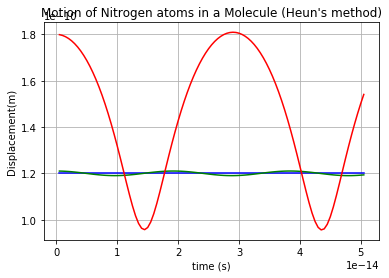

In [13]:
i=1                          
x_0 = 1.2e-10

while i <= 3: 
    x = x_0
    color = 'b-'
    if i == 2:
        x = 1.21e-10
        color = 'g-'
    if i == 3:
        color ='r-'
        x = 1.8e-10
    v =0
    t = 0
    dt = 5e-16
    s = np.array([x, v])   
    def deriv(s, v):
        x = s[0]
        v = s[1]
        dxdt = v
        dvdt = (-2 * Um * alpha * (1 - np.exp(-alpha * (x-x_0))) * np.exp(-alpha * (x-x_0)))/m
        return np.array([dxdt, dvdt])    

    def HeunStep (s, t, deriv, dt):   
        f1 = deriv(s,t)        
        f2 = deriv(s+f1*dt,t+dt)
        return (0.5*(f1+f2)*dt)+s 

    ylist=[]
    xlist=[]
    while t < 5e-14:
        s = HeunStep(s, t, deriv, dt)  
        t  = t + dt;
        xlist.append(t)
        ylist.append(s[0])
        
    pl.plot(xlist, ylist, color)
    pl.xlabel("time (s)")
    pl.ylabel("Displacement(m)")
    pl.title("Motion of Nitrogen atoms in a Molecule (Heun's method)")
    pl.grid()
    i = i + 1

In [14]:
Oscillations_graph = 0.25
Time_graph = 4.8690e-15
frequency_graph = Oscillations_graph / Time_graph
print ("Frequency is: %5.2e" %frequency_graph)

Frequency is: 5.13e+13


At small amplitudes, Heun's method's result for frequency is close to the frequency gotten from Experimental analysis and the Taylor expansion of the Morse Potential. At higher amplitude, the Heun's method gives an inaccurate value for frequency as the motion can't be modelled and regarded as Simple Harmonic Motion anymore. At higher amplitude, atoms would take more time to complete a to-and-fro vibrational motion.

## Conclusion 
In this project, we analyzed the motion of nitrogen atoms in a nitrogen molecule using experimental data, analytical approximation (Taylor Series) to the Morse Potential and the Heun Method. We needed to validate that results were consistent with all methods. Comparing the value of frequency gotten from each method we found out they were about the same values. Frequency from the Experimental model, Taylor expansion, and Heun's method were found to be $5.19\times 10^{13}$ Hz, $5.19\times 10^{13}$ Hz, and $5.13\times 10^{13}$ Hz respectively. The Heun's method is really good at making approximations of oscillations at low amplitude; a large amplitude model generated by the Heun's method would have significant discrepancies when compared to experimental data.